<a href="https://colab.research.google.com/github/nadee13/cats-vs-dogs/blob/master/Cats_vs_Dogs_%5Bby_Nadeesha%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadeeshawijesinghe","key":"c21c5b1a051569f52ffbfb10fffd03f9"}'}

In [0]:
! mkdir /root/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/kaggle.json

In [0]:
! chmod 600 /root/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

500 - An internal server error occurred. Please ensure that your API client is up to date. If it is, please report a bug at github.com/Kaggle/kaggle-api


In [9]:
!kaggle competitions list

ref                                                deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                                   2030-01-01 00:00:00  Getting Started  Knowledge       3065           False  
titanic                                            2030-01-01 00:00:00  Getting Started  Knowledge      11557           False  
house-prices-advanced-regression-techniques        2030-01-01 00:00:00  Getting Started  Knowledge       4399           False  
imagenet-object-localization-challenge             2029-12-31 07:00:00  Research         Knowledge         48           False  
competitive-data-science-predict-future-sales      2019-12-31 23:59:00  Playground           Kudos       3715           False  
kuzushiji-recognition                              2019-10-14 23:59:00  Playground         $15,000      

In [10]:
! kaggle datasets download -d tongpython/cat-and-dog

 95% 206M/217M [00:04<00:00, 72.6MB/s]
100% 217M/217M [00:04<00:00, 54.3MB/s]


In [11]:
! mkdir cat-and-dog
! unzip cat-and-dog.zip -d cat-and-dog

Archive:  cat-and-dog.zip
  inflating: cat-and-dog/training_set.zip  
  inflating: cat-and-dog/test_set.zip  


In [12]:
! mkdir cat-and-dog/training_set
! unzip cat-and-dog/training_set.zip -d cat-and-dog

Archive:  cat-and-dog/training_set.zip
   creating: cat-and-dog/training_set/cats/
  inflating: cat-and-dog/training_set/cats/_DS_Store  
  inflating: cat-and-dog/training_set/cats/cat.1.jpg  
  inflating: cat-and-dog/training_set/cats/cat.10.jpg  
  inflating: cat-and-dog/training_set/cats/cat.100.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1000.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1001.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1002.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1003.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1004.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1005.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1006.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1007.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1008.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1009.jpg  
  inflating: cat-and-dog/training_set/cats/cat.101.jpg  
  inflating: cat-and-dog/training_set/cats/cat.1010.jpg  

In [13]:
! mkdir cat-and-dog/test_set
! unzip cat-and-dog/test_set.zip -d cat-and-dog

Archive:  cat-and-dog/test_set.zip
   creating: cat-and-dog/test_set/cats/
  inflating: cat-and-dog/test_set/cats/_DS_Store  
  inflating: cat-and-dog/test_set/cats/cat.4001.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4002.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4003.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4004.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4005.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4006.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4007.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4008.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4009.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4010.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4011.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4012.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4013.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4014.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4015.jpg  
  inflating: cat-and-dog/test_set/cats/cat.4016.jpg  
  inflatin

In [0]:
!rm -rf /content/cat-and-dog/training_set/cats/_DS_Store
!rm -rf /content/cat-and-dog/training_set/dogs/_DS_Store
!rm -rf /content/cat-and-dog/test_set/cats/_DS_Store
!rm -rf /content/cat-and-dog/test_set/dogs/_DS_Store

In [14]:
!pip install keras

In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

import pickle

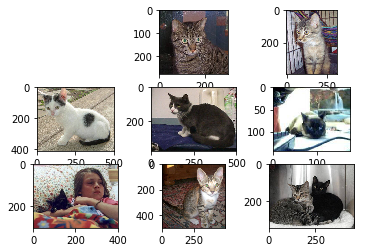

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot
from matplotlib.image import imread


folder = '/content/cat-and-dog/training_set/cats/'
for i in range(1,9):
  pyplot.subplot(330 + 1 + i)
  filename = folder + 'cat.' + str(i) + '.jpg'
  image = imread(filename)
  pyplot.imshow(image)
pyplot.show()

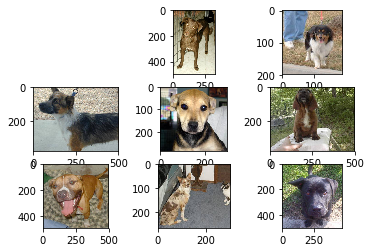

In [24]:
folder = '/content/cat-and-dog/training_set/dogs/'
for i in range(1,9):
  pyplot.subplot(330 + 1 + i)
  filename = folder + 'dog.' + str(i) + '.jpg'
  image = imread(filename)
  pyplot.imshow(image)
pyplot.show()

In [36]:
# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

W0722 07:18:43.494384 139882201675648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0722 07:18:43.515624 139882201675648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0722 07:18:43.553767 139882201675648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0722 07:18:43.602468 139882201675648 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0722 07:18:43.605206 1398822016

87916544/87910968 [==============================] - 3s 0us/step


In [37]:
base_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(2, activation='softmax')(x)

In [0]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

In [0]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]
  
def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [0]:
# create data generator
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [113]:
# prepare iterators
train_it = datagen.flow_from_directory('/content/cat-and-dog/training_set/',
	class_mode='categorical', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory('/content/cat-and-dog/test_set/',
	class_mode='categorical', batch_size=64, target_size=(200, 200))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [101]:
cls_train = train_it.classes
print(cls_train[4000:4009])

[1 1 1 1 1 1 1 1 1]


In [102]:
image_paths_train = path_join('/content/cat-and-dog/training_set/', train_it.filenames)
images = load_images(image_paths = image_paths_train[4000:4001])
print(images.shape)

(9,)


In [0]:
# train the model on the new data for a few epochs
history = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=0)

In [115]:
print(history.history)

{'val_loss': [0.7850295967444063, 0.6394766566191225, 0.3401949746632995, 0.525512023758804, 0.25305384784417406, 0.47515662544090725, 0.3395410977186668, 0.5385404339173527, 0.2839122899767602, 0.6855973961385122, 0.3094315099476068, 1.7000890355032385, 0.30218464102153286, 0.27818452884009115, 0.24467744174433584, 0.2814360712196846, 0.25182719755971233, 0.35130668742926185, 0.3019783327056241, 0.2827141574715057], 'val_acc': [0.9362333170034717, 0.9510627781113244, 0.9728126545030176, 0.9624320316656474, 0.9797330696984676, 0.9639149778147352, 0.9742956005931784, 0.9614434009781582, 0.9762728620860108, 0.9451309936622906, 0.9762728621154744, 0.872960949173907, 0.9777558082056352, 0.979238754354723, 0.9782501236083068, 0.9777558082350987, 0.9797330696984676, 0.9747899159958501, 0.9772614928913541, 0.9777558082645622], 'loss': [0.07152201481615093, 0.06625077196057204, 0.05304965272406367, 0.04136699705195633, 0.04303457906324883, 0.03734130520569852, 0.037176239479750524, 0.035904627

In [116]:
# evaluate model
_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

> 97.726


[0]


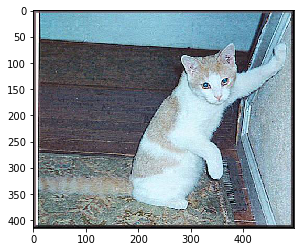

In [248]:
image = imread('/content/cat-and-dog/test_set/cats/cat.4001.jpg')
pyplot.imshow(image)

image = img_to_array(load_img('/content/cat-and-dog/test_set/cats/cat.4001.jpg',target_size=(200,200)))
image = (image * 1.0/255)
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
y_prob = model.predict(image)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)

[1]


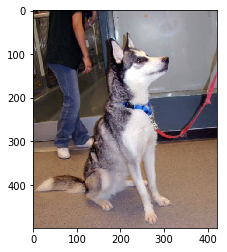

In [249]:
image = imread('/content/cat-and-dog/test_set/dogs/dog.4001.jpg')
pyplot.imshow(image)

image = img_to_array(load_img('/content/cat-and-dog/test_set/dogs/dog.4001.jpg',target_size=(200,200)))
image = (image * 1.0/255)
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
y_prob = model.predict(image)
y_classes = y_prob.argmax(axis=-1)
print(y_classes)